<a href="https://colab.research.google.com/github/lindseyhuppin/Neur265Work/blob/main/finalProject/FinalPosterPresentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This code is written for the Methods and Results portion of the Final Poster Presentation in Intro to Neural Data Analysis.

Lindsey Huppin

4/21/24

####Notes on data:

column information:

0 = index value

1 = patient ID

2 = cognitive status

3 = fresh brain weight

4 = number of pTDP43 positive cells per area_Grey matter

5 = total Iba1 positive area_Grey matter

6 = number of 6e10 positive objects per area_Grey matter

7 = total GFAP positive area_Grey matter

In [6]:
#adding libraries
import numpy as np
import matplotlib.pyplot as plt

In [7]:
#Importing the data as .csv files, organized from the original data source
data = np.loadtxt('https://raw.githubusercontent.com/lindseyhuppin/Neur265Work/main/finalProject/AlzheimerData.csv',delimiter = ',',dtype = 'str')
data[0][0] = '0' #this adjusts for an error that occurs when importing the data
data[3]

array(['3', 'H20.33.004', 'Dementia', '1261', '0', '4284872', '4.07E-05',
       '6546220.125'], dtype='<U11')

In [8]:
#Sorting the data
index = data[:,0].astype(int)
patientID = data[:,1]
cognitiveStatus = data[:,2]
brainWeight_temp = data[:,3]
pTDP43 = data[:,4].astype(float)
Iba1 = data[:,5].astype(float)
_6e10 = data[:,6].astype(float)
GFAP = data[:,7].astype(float)

brainWeight_str = np.delete(brainWeight_temp,30) #removes the unavailable data
brainWeight = brainWeight_str.astype(int)

In [9]:
pTDP43_noD = []
_6e10_noD = []
pTDP43_yD = []
_6e10_yD = []

Iba1_less = []
GFAP_less = []
Iba1_more = []
GFAP_more = []

for i in range(index.size):
  if cognitiveStatus[i] == 'No dementia':
    pTDP43_noD.append(pTDP43[i])
    _6e10_noD.append(_6e10[i])
  elif cognitiveStatus[i] == 'Dementia':
    pTDP43_yD.append(pTDP43[i])
    _6e10_yD.append(_6e10[i])
  else:
    print('Throwing error: statement not correct')

  if i == index.size-1:
    continue
  else:
    if brainWeight[i] <= 1162:
      Iba1_less.append(Iba1[i])
      GFAP_less.append(GFAP[i])
    elif brainWeight[i] > 1162:
      Iba1_more.append(Iba1[i])
      GFAP_more.append(GFAP[i])
    else:
      print('Throwing error: statement not correct')

(array([14.,  8.,  8.,  1.,  4.,  2.,  2.,  2.,  0.,  1.]),
 array([  457721.6641 ,  2522671.23569,  4587620.80728,  6652570.37887,
         8717519.95046, 10782469.52205, 12847419.09364, 14912368.66523,
        16977318.23682, 19042267.80841, 21107217.38   ]),
 <BarContainer object of 10 artists>)

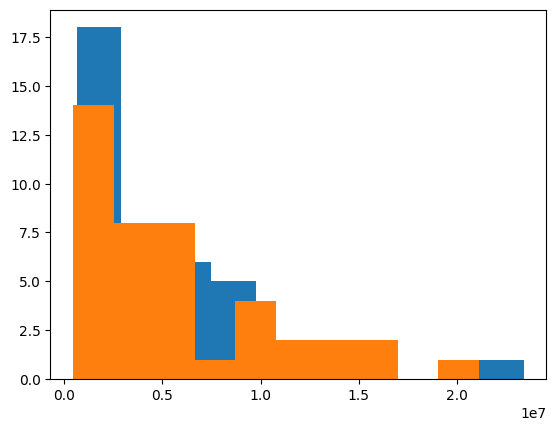

In [10]:
#histograms
plt.hist(GFAP_more)
plt.hist(GFAP_less)

In [11]:
#bar/pie graphs

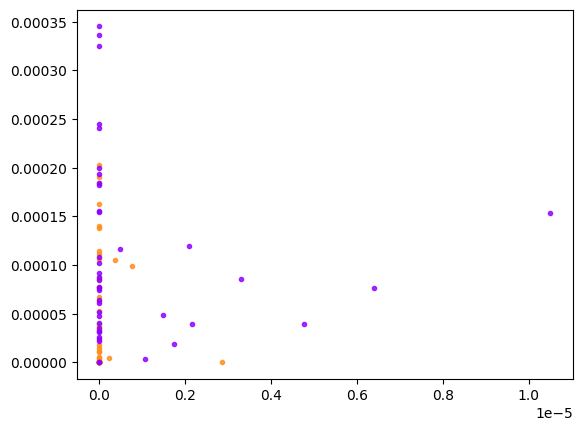

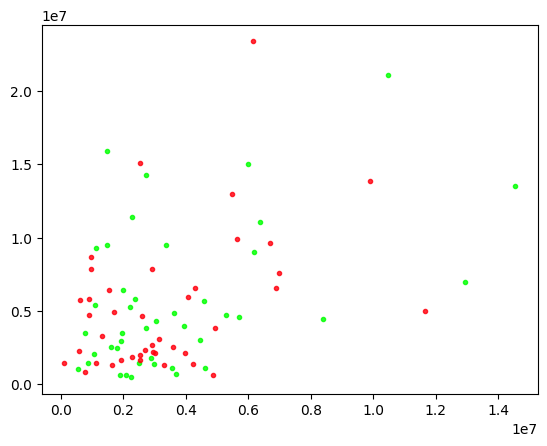

In [12]:
#scatter plots
plt.plot(pTDP43_noD,_6e10_noD,'.', color = '#ff8d1acf')
plt.plot(pTDP43_yD,_6e10_yD,'.', color = '#8f00ffcf')
plt.show()
plt.plot(Iba1_less,GFAP_less,'.', color = '#00ff00cf')
plt.plot(Iba1_more,GFAP_more,'.', color = '#ff000dcf')

plt.show()